<a href="https://colab.research.google.com/github/AshboyOP/Playstore-Apps-Review-Analysis/blob/main/PlaystoreAppsReviewAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **PLAYSTORE APPS REVIEW ANALYSIS**

## **Importing the required librabries**

In [1]:
# Numpy for Numerical Computation
import numpy as np
# Pandas for Data Manupulation
import pandas as pd
# Data Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

## **Loading the Play Store Data**

In [2]:
path = '/content/drive/MyDrive/Alma Capstone Projects/Play Store Data.csv'
df1 = pd.read_csv(path)

## **DATA EXPLORATION**

In [3]:
# Checking top 3 rows
df1.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [4]:
# Checking last 3 rows
df1.tail(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [5]:
# Checking the shape of the data
df1.shape
print('There are {} rows and {} columns present in the Dataset.'.format(df1.shape[0], df1.shape[1]))

There are 10841 rows and 13 columns present in the Dataset.


In [6]:
# Checking basic info about the data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


*Here we can see that there are more values missing in the **'Rating'** column and very few in the **'Current Version'** and **'Android Version'** columns. So we can do missing value imputation on the 'Rating' column and drop the rest of the missing values as they are very small as compared to the Data we have.*

In [7]:
# Checking descriptive statistics of the data
df1.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


*Here we can see that the difference between **75th percentile** and **Max** value is too large. This means there are **ouliers** present in the **Rating** column.*

# **DATA CLEANING**

Data Cleaning means the process of identifying the **incorrect, incomplete,inaccurate, irrelevant or missing part** of the data and then **modifying, replacing or deleting** them according to the necessity. Data cleaning is considered a foundational element of the basic data science.

In [8]:
# Checking for null values
# df1.isnull() --> This will give us an Boolean DataFrame
df1.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

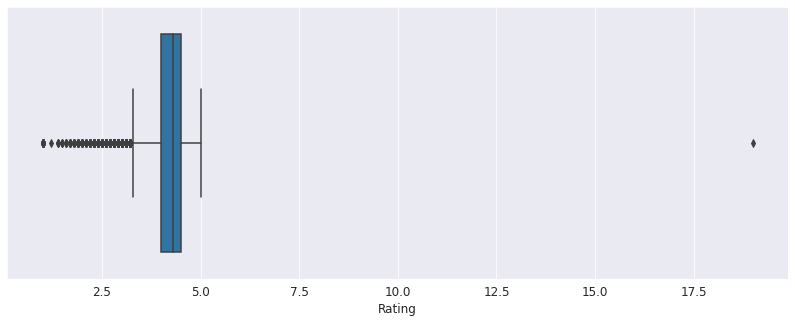

In [9]:
# Treating Rating column
plt.figure(figsize = (14,5))
sns.boxplot(df1['Rating'])
plt.xlabel('Rating',fontsize=12)
plt.xticks(fontsize=12)
plt.show()

*Most of the values in the **Boxplot** are present between **4-5** and we can see value nearing **20**. So this is an oulier and we have to treat it.*

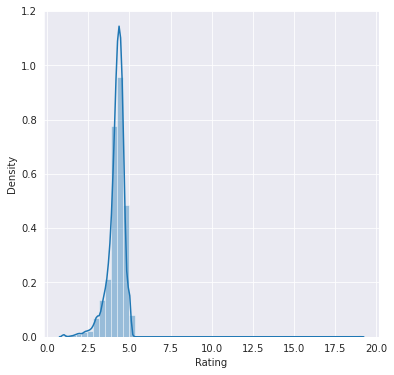

In [10]:
# Checking distribution plot
plt.figure(figsize = (6,6))
sns.distplot(df1['Rating'])
plt.show()

In [11]:
# Checking Outlier Values
df1[df1['Rating'] > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


*Only single row has **Rating** value greater than 5. So we can drop it.*

In [12]:
# Dropping the Oulier
df1.drop([10472], inplace=True)

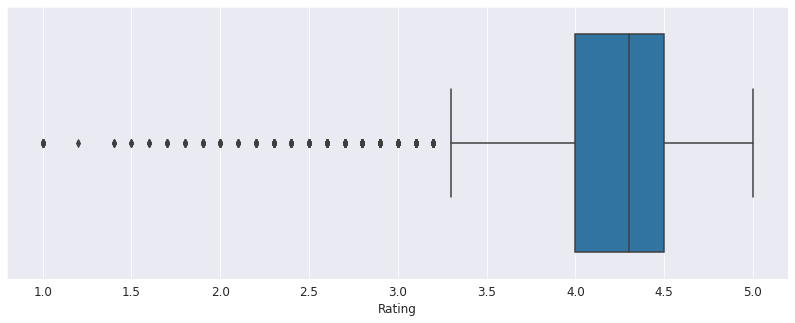

In [13]:
# Checking Boxplot after outlier treatment
plt.figure(figsize = (14,5))
sns.boxplot(df1['Rating'])
plt.xlabel('Rating',fontsize=12)
plt.xticks(fontsize=12)
plt.show()

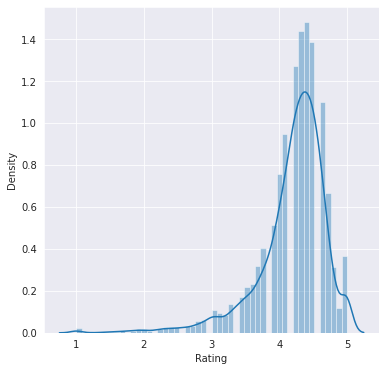

In [14]:
# Treating for NaN/Null values
plt.figure(figsize = (6,6))
sns.distplot(df1['Rating'])
plt.show()

*We can see that the distribution is **Negatively/Left skewed**. So it is identical to **Impute Missing** values with the **Median** of the **Rating** column.*

In [15]:
# Missing value treatment Rating Column
df1['Rating'].fillna(df1['Rating'].median(), inplace=True)
df1['Rating'].isnull().sum()

0

In [16]:
df1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

*There very few NaN/Null values left in our data so we can drop rest of the missing values.*

In [17]:
# Dropping rest of the null values
df1 = df1.dropna()

In [18]:
df1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

*All the **NaN/Null** values has been **treated**. Now we have to do some **Data Cleaning** and **Preprocessing** on the columns such as **Reviews**, **Size**, **Installs** and **Price**.*

In [19]:
# Cleaning Reviews Column
df1['Reviews'].head(3)

0      159
1      967
2    87510
Name: Reviews, dtype: object

In [20]:
df1['Reviews'] = df1['Reviews'].astype('float')
df1['Reviews'].dtypes

dtype('float64')

In [21]:
# Cleaning Size Column
df1['Size'].value_counts()

Varies with device    1694
11M                    197
12M                    196
14M                    193
13M                    191
                      ... 
430k                     1
429k                     1
200k                     1
460k                     1
619k                     1
Name: Size, Length: 457, dtype: int64

*Here we to treat the **string** value such as **'M'**, **'k'** and **'Varies with device'** and covert them to **float** values.*

In [23]:
# Defining function to convert values to Mega Bytes(MB)
def convert_to_MB(size):
    if size == "Varies with device":
        return np.nan
    elif "M" in size:
        size = size.replace("M","")
        size = float(size)
        return size
    elif "k" in size:
        size = size.replace("k","")
        size = round(float(size),2)
        size=size/1000
        return size

In [24]:
# Applying function
df1['Size'] = df1['Size'].apply(convert_to_MB)
df1['Size'].head()

0    19.0
1    14.0
2     8.7
3    25.0
4     2.8
Name: Size, dtype: float64

In [25]:
# Cleaning Installs column
df1['Installs'].value_counts()

1,000,000+        1578
10,000,000+       1252
100,000+          1169
10,000+           1052
1,000+             905
5,000,000+         752
100+               718
500,000+           538
50,000+            478
5,000+             476
100,000,000+       409
10+                385
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
Name: Installs, dtype: int64

*We have to remove the **"+"** and **","** from the column and convert it to **float** values.*

In [26]:
# Replacing "+" and ","
df1['Installs']  = df1['Installs'].str.replace("+", "")
df1['Installs']  = df1['Installs'].str.replace(",", "")
df1['Installs'] = df1['Installs'].astype('float')
df1['Installs'].head()

0       10000.0
1      500000.0
2     5000000.0
3    50000000.0
4      100000.0
Name: Installs, dtype: float64

In [27]:
# Cleaning the Price
df1['Price'].value_counts()

0         10032
$0.99       146
$2.99       129
$1.99        73
$4.99        72
          ...  
$19.90        1
$1.75         1
$14.00        1
$4.85         1
$1.04         1
Name: Price, Length: 92, dtype: int64

*We have to remove the **"$"** from the **Price** column.*

In [28]:
# Replacing "$" 
df1['Price'] = df1['Price'].str.replace('$', '')
df1['Price'] = df1['Price'].str.replace("'", '')
df1['Price'] = df1['Price'].astype('float')
df1['Price'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Price, dtype: float64

In [29]:
# Dropping duplicate rows
df1 = df1.drop_duplicates(subset='App',inplace=False)
df1.duplicated().sum()

0

*Now we have **no duplicates** in our data. Now the Data is well **cleaned** and ready to be **analysed** to get desirable **insights** and **inferences**.*

## **LOADING the USER REVIEWS DATA**

In [30]:
path = '/content/drive/MyDrive/Alma Capstone Projects/User Reviews.csv'
df2 = pd.read_csv(path)

## **DATA EXPLORATION**

In [31]:
# Checking top rows
df2.head(3)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN


In [32]:
# Checking last rows
df2.tail(3)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [33]:
# Checking the shape of the data
df2.shape
print('There are {} rows and {} columns present in the Dataset.'.format(df2.shape[0], df2.shape[1]))

There are 64295 rows and 5 columns present in the Dataset.


In [34]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


*Here we can see there are lots of **NaN/Null** values in the data so we will simply drop the null values.*

In [35]:
# Checking the descriptive statistics of the User Reviews Data
df2.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


## **DATA CLEANING**

In [36]:
# Checking for NaN/Null value
#df2.isnull --> This will give us an Boolean DataFrame
df2.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [37]:
# Dropping the NaN/Null values
df2 = df2.dropna()
df2.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

## **Exploratory Data Analysis(EDA)**

**EDA** is all about making sense of data in hand,before getting them dirty with it. **Exploratory Data Analysis** refers to the critical process of performing initial investigations on data so as to discover patterns,to **spot anomalies**,to test hypothesis and to check assumptions with the help of **summary statistics** and **graphical representations**.

## **1. Univariate Analysis**

**Univariate Analysis** explores each variable in the Data Set seperately. While it looks at the **range** and **central tendency** of the values in the variable.It describes the **pattern** of response to the variable. It describes each variable on its own.

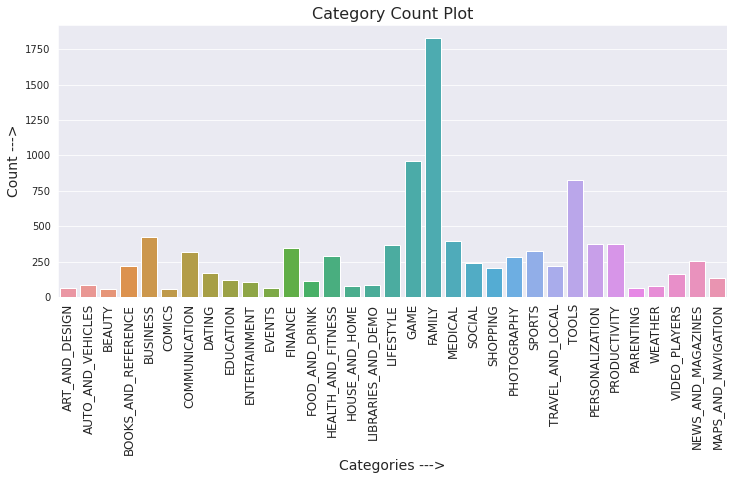

In [38]:
# Category count plot
plt.figure(figsize=(12,5))
sns.countplot(df1['Category'])
plt.title('Category Count Plot', fontsize=16)
plt.xlabel('Categories --->', fontsize=14)
plt.ylabel('Count --->', fontsize=14)
plt.xticks(rotation = 90, fontsize=12)
plt.show()

In [39]:
family_per = round((len(df1[df1['Category'] == 'FAMILY'])/len(df1['Category']))*100, 2)
game_per = round((len(df1[df1['Category'] == 'GAME'])/len(df1['Category']))*100, 2)
print('FAMILY category percentage : {}%\nGAME category percentage : {}%'.format(family_per, game_per))

FAMILY category percentage : 18.95%
GAME category percentage : 9.94%


# **Inferences**


1.   There are about **18.74%** of total Apps in the data belongs to the **FAMILY** category.
2.   Similarly about **10.84%** of total Apps belongs to the GAME category.



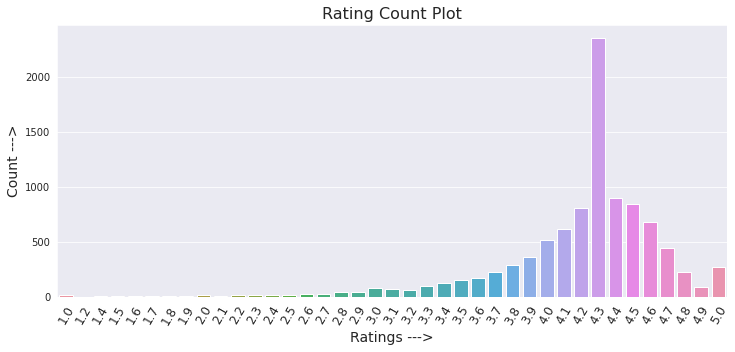

24.41
The average ratings of apps in the dataset is 4.19.


In [40]:
# Ratings Column
data = df1['Rating']
plt.figure(figsize = (12,5))
sns.countplot(data)
plt.title('Rating Count Plot', fontsize=16)
plt.xlabel('Ratings --->', fontsize=14)
plt.ylabel('Count --->', fontsize=14)
plt.xticks(rotation = 60, fontsize=12)
plt.show()

# Average ratings
mean = df1['Rating'].mean()
rating_count = round((len(df1[df1['Rating'] == 4.3])/len(df1['Rating']))*100, 2)
print(rating_count)
print('The average ratings of apps in the dataset is {:.2f}.'.format(mean))

# **Inferences**


1.   The **average ratings** of apps in the dataset is **4.20**.
2.   About **23.93%** of apps have an rating of **4.3**.



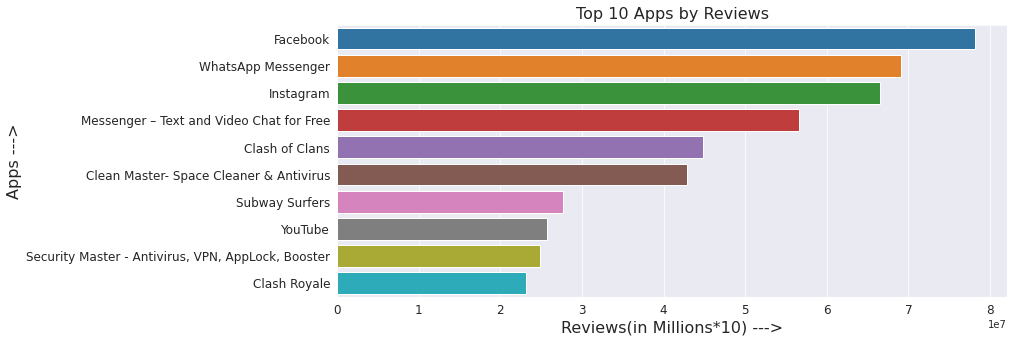

In [41]:
# Reviews column
df = df1[['Reviews', 'App']].sort_values('Reviews', ascending=False).head(10)
plt.figure(figsize = (12,5))
sns.barplot(df['Reviews'],df['App'], data=df)
plt.title('Top 10 Apps by Reviews', fontsize=16)
plt.xlabel('Reviews(in Millions*10) --->', fontsize=16)
plt.ylabel('Apps --->', fontsize=16)
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.show()

# **Inferences**


1.   The most reviewed app amongst all is **FACEBOOK** with almost **78.1 Million** reviews.



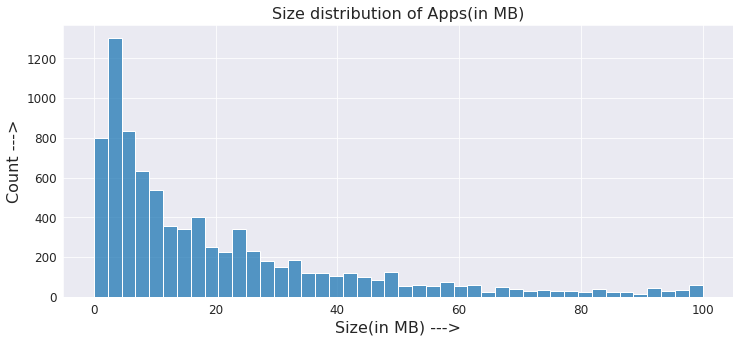

73.17
55.28


In [42]:
# Size Column
plt.figure(figsize = (12,5))
sns.histplot(df1['Size'])
plt.title('Size distribution of Apps(in MB)', fontsize=16)
plt.xlabel('Size(in MB) --->', fontsize=16)
plt.ylabel('Count --->', fontsize=16)
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.show()

# Percentage of app size less than 40MB
per_app_size1 = round(((len(df1[(df1['Size'] < 40.0) & (df1['Size'] != np.nan)])/len(df1['Size']))*100), 2)
per_app_size2 = round(((len(df1[(df1['Size'] < 20.0) & (df1['Size'] != np.nan)])/len(df1['Size']))*100), 2)
print(per_app_size1)
print(per_app_size2)

# **Inferences**


1.   There are about **73.17%** of total apps which have size **less** than **40MB**.
2.   And **55.28%** apps are **less** than **20MB**.



In [43]:
df1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

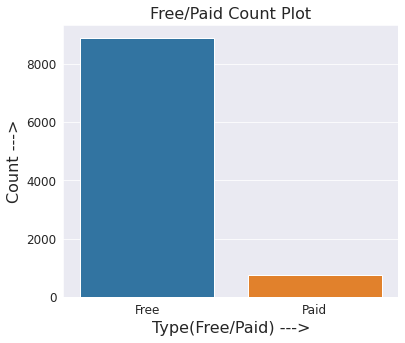

There are about 92.20% free Apps.


In [44]:
# Type column
plt.figure(figsize = (6,5))
sns.countplot(df1['Type'])
plt.title('Free/Paid Count Plot', fontsize=16)
plt.xlabel('Type(Free/Paid) --->', fontsize=16)
plt.ylabel('Count --->', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

data = df1['Type'].value_counts()
percentage_free_apps = ((data[0])/(data[0] + data[1])) * 100
print('There are about {:.2f}% free Apps.'.format(percentage_free_apps))

# **Inferences**

1.   There are about **92.20%** of total apps which are **Free**.
2.   And about **7.80%** are **Paid** apps.

In [45]:
# Price Column
df = df1[['Price', 'App', 'Category']].sort_values('Price',ascending=False).head(1)
print('The most expensive App is {} with an price of {} dollars.'.format(df['App'].values, df['Price'].values))
print(df['Category'].values)

The most expensive App is ["I'm Rich - Trump Edition"] with an price of [400.] dollars.
['LIFESTYLE']


# **Inferences**

1.   The most expensive App is **"I'm Rich - Trump Edition"** having price **400 Dollars**.
2.   And the most expensive App belongs to the 'LIFESTYLE' Category



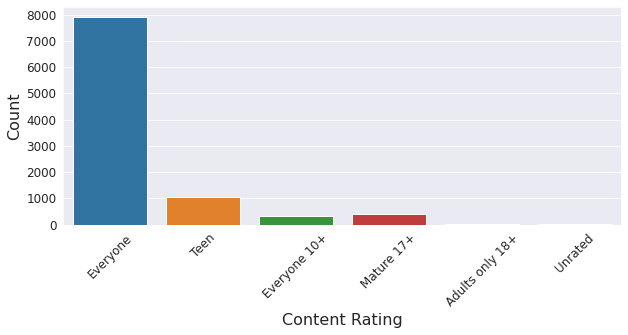

81.81% of apps are acessible to everyone to 10.74% apps are only acessible to Teens and 3.33% accessible to Mature 17+.


In [46]:
# Content Rating column
plt.figure(figsize=(10,4))
sns.countplot(df1['Content Rating'])
plt.xlabel('Content Rating',fontsize=16)
plt.ylabel('Count',fontsize=16)
plt.xticks(rotation = 45,fontsize=12)
plt.yticks(fontsize=12)
plt.show()

data = df1['Content Rating'].value_counts()
per1 = (data[0]/len(df1['Content Rating']))*100
per2 = (data[1]/len(df1['Content Rating']))*100
per3 = (data[3]/len(df1['Content Rating']))*100
print('{:.2f}% of apps are acessible to everyone to {:.2f}% apps are only acessible to Teens and {:.2f}% accessible to Mature 17+.'.format(per1, per2, per3))

# **Inferences**

1.   **81.81%** of total apps are accessible to **EVERYONE**.
2.   While **10.74%** apps are only accessible to **TEENS** and **3.33%** apps are only accessible to **MATURE 17+**.



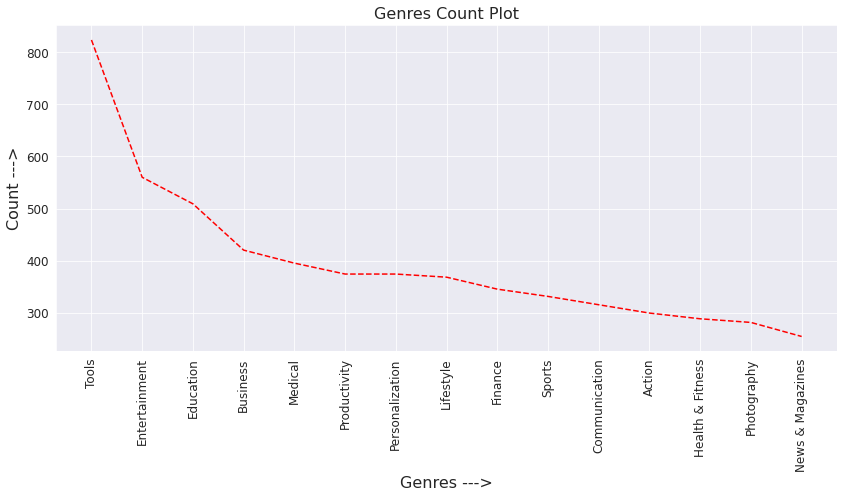

In [47]:
# Genres column
plt.figure(figsize=(14, 6))
df = df1['Genres'].value_counts().sort_values(ascending=False).head(15)
plt.plot(df, 'r--')
plt.title('Genres Count Plot', fontsize=16)
plt.xlabel('Genres --->', fontsize=16)
plt.ylabel('Count --->', fontsize=16)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# **Inferences**

1.   **TOOLS** genres have the most number of count **over 800** apps. 



In [48]:
# Sentiments Distribution
df2.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


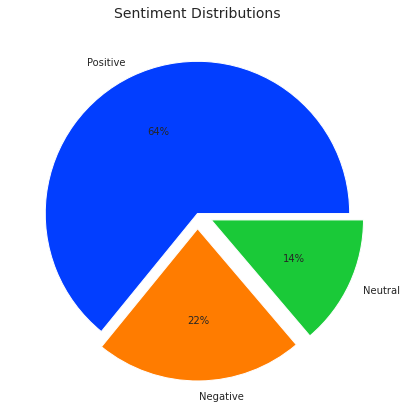

In [49]:
d1 = round(((len(df2[df2['Sentiment'] == 'Positive'])/len(df2['Sentiment']))*100), 2)
d2 = round(((len(df2[df2['Sentiment'] == 'Negative'])/len(df2['Sentiment']))*100), 2)
d3 = round(((len(df2[df2['Sentiment'] == 'Neutral'])/len(df2['Sentiment']))*100), 2)
data = [d1,d2,d3]
labels = ['Positive', 'Negative', 'Neutral']
plt.figure(figsize=(7,7))
plt.pie(data, labels = labels, colors = sns.color_palette('bright'), autopct = '%0.00f%%', explode = [0.0, 0.1, 0.1])
plt.title('Sentiment Distributions', fontsize=14)
plt.show()


# **Inferences**

1.   Here we can see we have about **64%** **Positive Sentiments**.
2.  **22% Negative sentiments** and **14%** are **Nuetral Sentiments**.



# **Bivariate Analysis**

Bivariate analysis is one of the simplest forms of **statistical analysis**. 
It involves the analysis of two variables (often denoted as X, Y), for the purpose of determining the empirical **relationship** between them. 
It is the analysis of the relationship between the two variables.

In [50]:
df1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

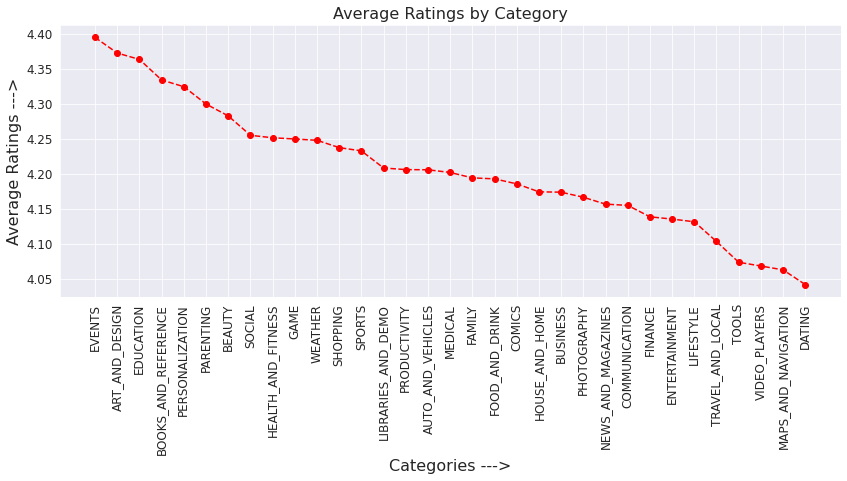

4.4
4.04


In [51]:
data = df1.groupby('Category')['Rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(14, 5))
plt.plot(data, "ro--")
plt.title('Average Ratings by Category', fontsize=16)
plt.xlabel('Categories --->', fontsize=16)
plt.ylabel('Average Ratings --->', fontsize=16)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Highest and Lowest average rating
high = data[0]
low = data[-1]
print(round(high, 2))
print(round(low, 2))

# **Inferences**


1.   **EVENTS** category has the **highest** average ratings of **4.39**.
2.   **DATING** category has the **lowest** average ratings of **4.04**.



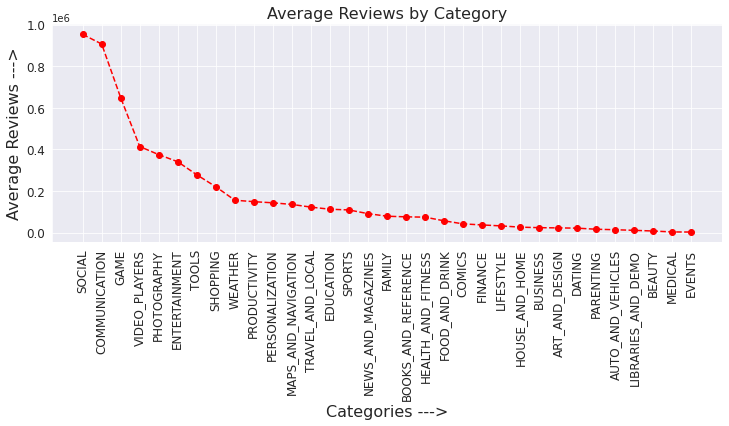

953672.81
2515.91


In [52]:
data = df1.groupby('Category')['Reviews'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 4))
plt.plot(data, "ro--")
plt.title('Average Reviews by Category', fontsize=16)
plt.xlabel('Categories --->', fontsize=16)
plt.ylabel('Average Reviews --->', fontsize=16)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Highest and Lowest average rating
high = data[0]
low = data[-1]
print(round(high, 2))
print(round(low, 2))

# **Inferences**


1.   **SOCIAL** category has the **highest** average reviews of **953.6k**.
2.   **EVENTS** category has the **lowest** average reviews of **2.5k**.

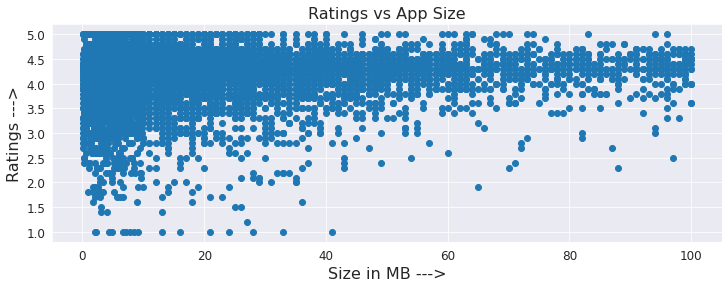

In [53]:
plt.figure(figsize=(12, 4))
plt.scatter(df1['Size'], df1['Rating'])
plt.title('Ratings vs App Size', fontsize=16)
plt.xlabel('Size in MB --->', fontsize=16)
plt.ylabel('Ratings --->', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


# **Inferences**

1.   If the size of the App increases the Ratings are on a high side.
2.   Most of the Ratings are almost above 2.5.

# **3. Mutivariate Analysis**
**Multivariate Analysis (MVA)** is a **Statistical** procedure for **analysis of data** involving more than one type of measurement or observation. It may also mean solving problems where more than one dependent variable is analyzed simultaneously with other variables.

In [54]:
# Correalation matrix
df1.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.050215,0.045525,0.034310,-0.018673
Reviews,0.050215,1.000000,0.179276,0.625158,-0.007604
Size,0.045525,0.179276,1.000000,0.134215,-0.022492
Installs,0.034310,0.625158,0.134215,1.000000,-0.009413
Price,-0.018673,-0.007604,-0.022492,-0.009413,1.000000


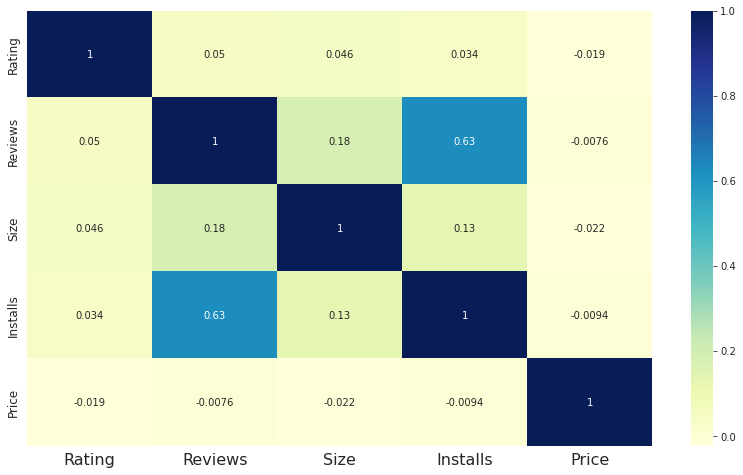

In [55]:
plt.figure(figsize=(14, 8))
sns.heatmap(df1.corr(), annot=True, cmap="YlGnBu")
plt.xticks(fontsize=16)
plt.yticks(fontsize=12)
plt.show()

# **Inferences**

1.   Here we can say that the **'INSTALLS'** and **'REVIEWS'** variables have **high positive correlation** of **0.63**.
2.   Similarly **'PRICE'** and **'RATING'** and **negatively correlated** to each other, as the price increases the rating decreases.
3.   And **'SIZE'** is very **low positively** correlated with **'REVIEWS'** and **'INSTALLS'**.

In [56]:
# Merging both the datasets
df = df1.merge(df2, how='inner', on='App')
df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000


In [57]:
df.corr()

,Rating,Reviews,Size,Installs,Price,Sentiment_Polarity,Sentiment_Subjectivity
Rating,1.000000,0.075736,0.167530,0.020145,-0.010055,0.092903,0.068758
Reviews,0.075736,1.000000,0.430137,0.564256,-0.020591,-0.080021,-0.009315
Size,0.167530,0.430137,1.000000,0.213743,-0.019787,-0.159389,0.009186
Installs,0.020145,0.564256,0.213743,1.000000,-0.025213,-0.057842,-0.006307
Price,-0.010055,-0.020591,-0.019787,-0.025213,1.000000,0.024148,0.003182
Sentiment_Polarity,0.092903,-0.080021,-0.159389,-0.057842,0.024148,1.000000,0.259668
Sentiment_Subjectivity,0.068758,-0.009315,0.009186,-0.006307,0.003182,0.259668,1.000000


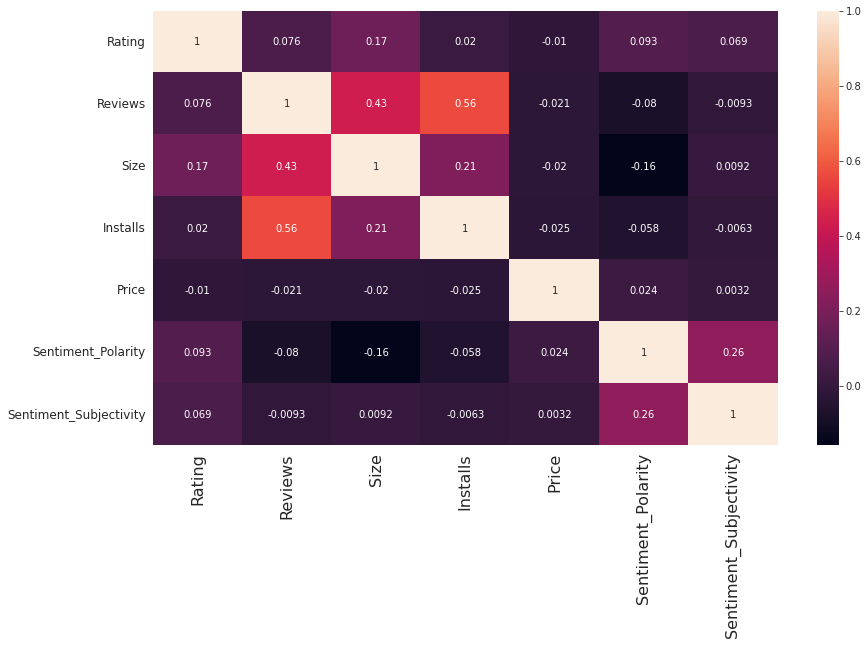

In [58]:
plt.figure(figsize=(14, 8))
sns.heatmap(df.corr(), annot=True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=12)
plt.show()

In [59]:
# Sentiments Analysis
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333


In [60]:
# Top 10 App having highest positive sentiment
data = df[df['Sentiment'] == 'Positive']
data1 = data.groupby('App')['Sentiment'].count().sort_values(ascending=False).head(10)
data1

App
Helix Jump                        209
Duolingo: Learn Languages Free    200
Calorie Counter - Macros          174
Calorie Counter - MyFitnessPal    169
Bowmasters                        169
10 Best Foods for You             162
Google Photos                     143
8fit Workouts & Meal Planner      137
Garena Free Fire                  136
DRAGON BALL LEGENDS               127
Name: Sentiment, dtype: int64

In [61]:
# Top 10 App having most negative sentiment
data = df[df['Sentiment'] == 'Negative']
data1 = data.groupby('App')['Sentiment'].count().sort_values(ascending=False).head(10)
data1

App
Angry Birds Classic      147
Candy Crush Saga         126
Bowmasters               119
8 Ball Pool              106
Candy Crush Soda Saga     96
Garena Free Fire          81
Cooking Fever             79
Alto's Adventure          72
Block Puzzle              71
Agar.io                   66
Name: Sentiment, dtype: int64

# **CONCLUSIONS**

1.  Apps having categories like **FAMILY** and **GAME** are dominating the **Android Market** with aprrox **18.74% Apps** belonging to the **FAMILY** category and **10.84% Apps** belonging to the **GAME** category.
2. The most reviewed app amongst all is **FACEBOOK** with almost **78.1 Million** reviews.
3. Apps having **size less** than **40 MB** are covering about **73.17%** of total apps in the **Android Market**.
4. **Installation** of Apps and there **Reviews** are highly correlated. Having a **correlation** of **0.63** which is quite obvious.
5. **PRICE** and **RATING** are **negatively correlated** to each other, as the **price increases** the **rating decreases**.
6. **81.81%** of total apps are accessible to **EVERYONE**, while **10.74%** apps are only accessible to **TEENS**.
7. Total of about **64%** customers are **Happy** using the apps and **22%** of them have **Negative sentiments** about the Apps.
8. **SOCIAL** category apps have an big influence having **average reviews** of **953.6k** which is **very high** as compared to other categories.
9. There are about **92.20%** of total apps which are **Free**.
10. The **average ratings** of apps in the dataset is **4.20**.
11. The most expensive App is **I'm Rich-Trump Edition** having price **400 Dollars** belongs to the **LIFESTYLE** Category.
12. **TOOLS** genres have the most number of count over **800 apps**.
13. **EVENTS** category has the **highest average ratings** of **4.39** and **DATING** category has the **lowest average ratings** of **4.04**.
14. If the **size** of the App **increases** the **Ratings** are on a **high** side.
